### Real + Redshift Space - Plot 3: RVPF con diluciones


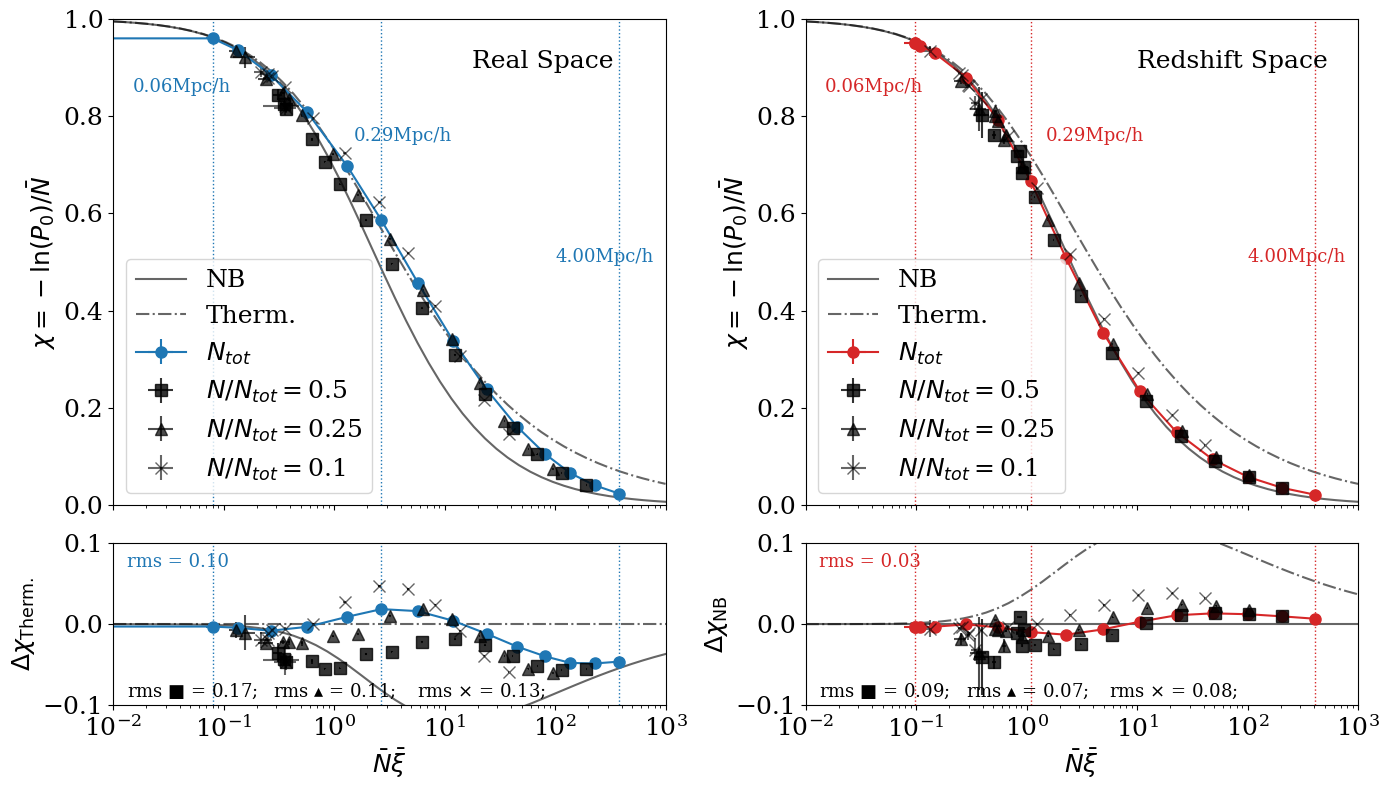

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *
def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
plt.rcParams["font.family"] = "serif"
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #
fs = 18
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True \
    gridspec_kw={'height_ratios': [3, 1]})
#fs = 18
ms = 8
#ax2=fig.add_subplot(212)
ax = axs[0,0]
ax1 = axs[1,0]

#for ax,ax1,color,text,file in zip((axs[0,0],axs[0,1]),(axs[1,0],axs[1,1]),\
#    ['C00','C03'],['Real Space','Redshift Space'],\
#        ['../data/allgxs_nesf100000_allR_jk.npz','../data/allgxs_nesf100000_redshiftz_allR_jk.npz']):
for ax,ax1,color,text,file in zip((axs[0,0],axs[0,1]),(axs[1,0],axs[1,1]),\
    ['C00','C03'],['Real Space','Redshift Space'],\
        ['../data/allgxs_nesf100000_jk.npz','../data/allgxs_nesf100000_redshiftz_jk.npz']):
    
    # chi vs Nxi
    xmin, xmax = 1E-2, 1E3 
    x = np.geomspace(xmin,xmax,50)
    ax.plot(x,np.log(1+x)/x,label='NB',c='k',alpha=0.6)
    ax.plot(x,(np.sqrt(1+2*x)-1)/x,label='Therm.',c='k',ls='-.',alpha=0.6)

    if text=='Real Space':
        ax1.plot(x,chi_NB(x)-chi_T(x),c='k',alpha=0.6)
        ax1.plot(x,chi_T(x)-chi_T(x),c='k',ls='-.',alpha=0.6)
    if text=='Redshift Space':
        ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
        ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

    stats = np.load(file)
    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']
    #print(rs)
    #print(chi)
    #print(NXi)

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot chi(NXi)
    ebar=ax.errorbar(NXi,chi,xerr=NXierr,yerr=chierr,marker='o',label=r'$N_{tot}$',color=color,markersize=ms)
    if text=='Real Space': 
        ax1.errorbar(NXi,chi-chi_T(NXi),xerr=NXierr,yerr=chierr,marker='o',color=color,markersize=ms)

        rms = np.sqrt(np.sum((chi-chi_T(NXi))**2))
        ax1.text(.025,.85,f'rms = {rms:.2f}',size=fs-5,transform=ax1.transAxes,color=color)

    if text=='Redshift Space': 
        ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker='o',color=color,markersize=ms)

        rms = np.sqrt(np.sum((chi-chi_NB(NXi))**2))
        ax1.text(.025,.85,f'rms = {rms:.2f}',size=fs-5,transform=ax1.transAxes,color=color)

    # Plot lineas verticales con escalas
    space = 1.2
    lw = 1
    ls = ':'
    #np.nonzero(np.in1d(A,B))[0]
    for ind,xpos,ypos in zip([1,6,-1],[1.5E-2,1.5,1E2],[.85,.75,.5]):
        #print(NXi[ind])
        vline=ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
        ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
        ax.text(xpos,ypos,f'{rs[ind]/1000.:.2f}Mpc/h',\
                 color=color,size=fs-5)
        
    # Plot Diluciones
    for ngxs,m,a,xpos,lsym in zip(['0.5','0.25','0.1'],['s','^','x'],[.8,.7,.6],\
                             [.025,.29,.55],[r'$\blacksquare$',r'$\blacktriangle$',r'$\times$']):

        if text=='Redshift Space': 
            modifier='redshiftz_'
        else:
            modifier=''

        #file = f'../data/dilut{ngxs}_nesf100000_{modifier}allR_jk.npz'
        file = f'../data/dilut{ngxs}_nesf100000_{modifier}jk.npz'
        stats = np.load(file)
        chi = stats['arr_0']
        chi_std = stats['arr_1']
        NXi = stats['arr_2']
        NXi_std = stats['arr_3']
        P0 = stats['arr_4']
        P0_std = stats['arr_5']
        N_mean = stats['arr_6']
        N_mean_std = stats['arr_7']
        xi_mean = stats['arr_8']
        xi_mean_std = stats['arr_9']
        rs = stats['arr_10']

        P0err=delta_P0(P0,10E5)
        NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
        chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

        ax.errorbar(NXi,chi,xerr=NXierr,yerr=chierr,\
            fmt=m,alpha=a,color='k',label=r'$N/N_{tot}=$'+ngxs,markersize=ms)
        if text=='Real Space': 
            ax1.errorbar(NXi,chi-chi_T(NXi),xerr=NXierr,yerr=chierr,\
            fmt=m,alpha=a,color='k',markersize=ms)

            rms = np.sqrt(np.sum((chi-chi_T(NXi))**2))
            ax1.text(xpos,.05,rf'rms {str(lsym)} = {rms:.2f};',size=fs-5,transform=ax1.transAxes)
        
        if text=='Redshift Space': 
            ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,\
            fmt=m,alpha=a,color='k',markersize=ms)

            a=r'$\alpha$'
            rms = np.sqrt(np.sum((chi-chi_NB(NXi))**2))
            ax1.text(xpos,.05,rf'rms {str(lsym)} = {rms:.2f};',size=fs-5,transform=ax1.transAxes)
            #ax1.text(xpos,.9,rf'rms{a}={rms:.2f}',size=fs-5,transform=ax1.transAxes)



    ax.legend(loc=3,fontsize=fs)#,edgecolor='none',framealpha=0)
    ax.set_xscale('log')
    ax.set_ylabel(r'$\chi=-\mathrm{ln}(P_0)/\bar{N}$',fontsize=fs)
    if text=='Redshift Space':
        ax.text(.6,.9,text, transform=ax.transAxes,fontsize=fs)
    else: 
        ax.text(.65,.9,text, transform=ax.transAxes,fontsize=fs)
    ax.set_xticks([])

    #ax1.set_yticks([-1,-.5,0,.5,1.])
    ax1.set_xscale('log')
    ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
    if text=='Real Space': ax1.set_ylabel(r'$\Delta\chi_\mathrm{Therm.}$',fontsize=fs)
    if text=='Redshift Space': ax1.set_ylabel(r'$\Delta\chi_\mathrm{NB}$',fontsize=fs)

    ax1.set_ylim([-.1,.1])
    ax.set_ylim([0,1])
    ax.set_xlim([1E-2,1E3])


plt.tight_layout()
plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.png')
plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.pdf')
plt.show()

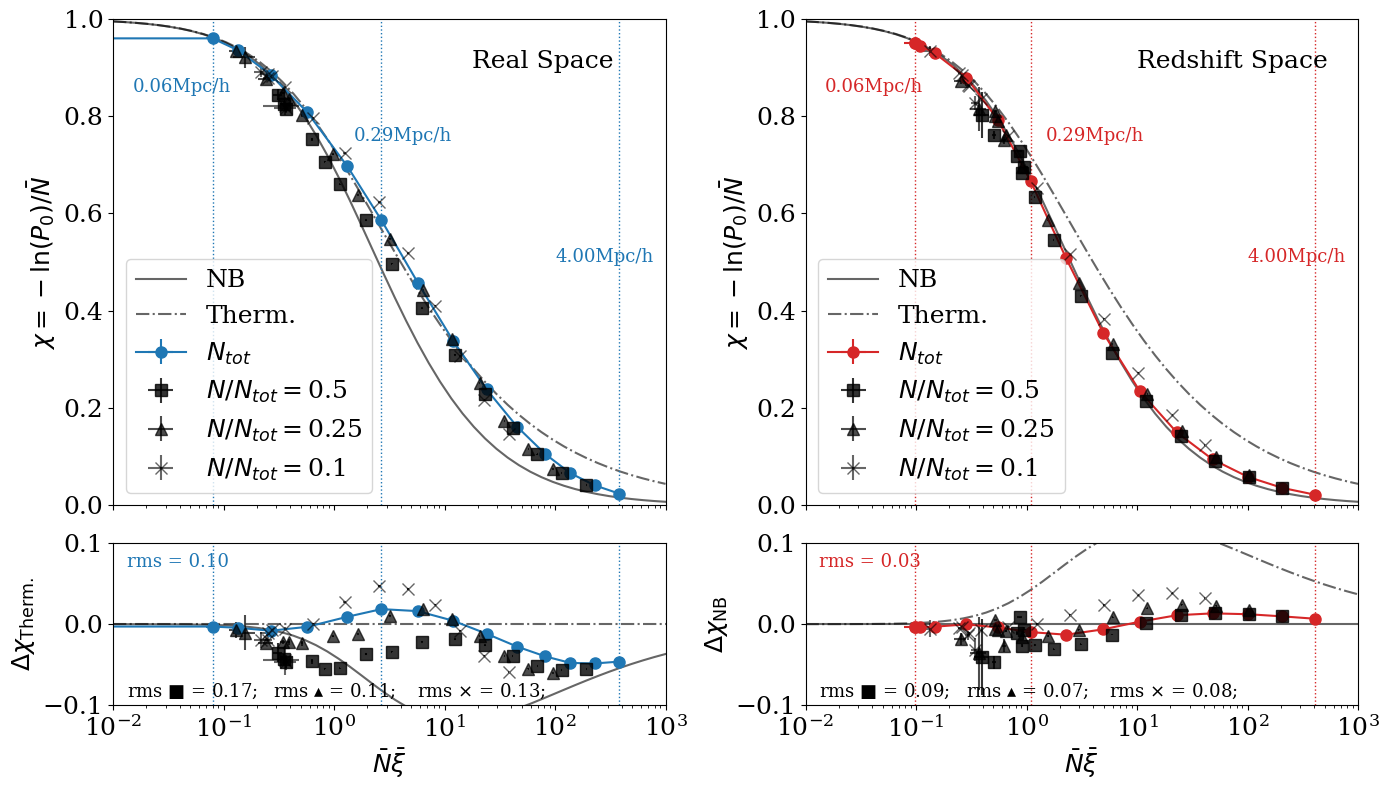

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *


def chi_NB(x):
    return np.log(1 + x) / x


def chi_T(x):
    return (np.sqrt(1 + 2 * x) - 1) / x


plt.rcParams["font.family"] = "serif"
fs = 18
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ms = 8

ax = axs[0, 0]
ax1 = axs[1, 0]

for ax, ax1, color, text, modifier in zip(axs[0], axs[1], ['C00', 'C03'], ['Real Space', 'Redshift Space'],
                                          ['', 'redshiftz_']):
    xmin, xmax = 1E-2, 1E3
    x = np.geomspace(xmin, xmax, 50)
    ax.plot(x, chi_NB(x), label='NB', c='k', alpha=0.6)
    ax.plot(x, chi_T(x), label='Therm.', c='k', ls='-.', alpha=0.6)

    if text == 'Real Space':
        ax1.plot(x, chi_NB(x) - chi_T(x), c='k', alpha=0.6)
        ax1.plot(x, chi_T(x) - chi_T(x), c='k', ls='-.', alpha=0.6)
    if text == 'Redshift Space':
        ax1.plot(x, chi_NB(x) - chi_NB(x), c='k', alpha=0.6)
        ax1.plot(x, chi_T(x) - chi_NB(x), c='k', ls='-.', alpha=0.6)

    file = f'../data/allgxs_nesf100000_jk.npz'
    if text == 'Redshift Space':
        file = f'../data/allgxs_nesf100000_redshiftz_jk.npz'

    stats = np.load(file)
    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err = delta_P0(P0, 10E5)
    NXierr = delta_NXi(NXi, N_mean, N_mean_std, xi_mean, xi_mean_std)
    chierr = delta_chi(chi, P0, P0err, N_mean, N_mean_std)

    ebar = ax.errorbar(NXi, chi, xerr=NXierr, yerr=chierr, marker='o', label=r'$N_{tot}$', color=color, markersize=ms)
    if text == 'Real Space':
        ax1.errorbar(NXi, chi - chi_T(NXi), xerr=NXierr, yerr=chierr, marker='o', color=color, markersize=ms)

        rms = np.sqrt(np.sum((chi - chi_T(NXi)) ** 2))
        ax1.text(.025, .85, f'rms = {rms:.2f}', size=fs - 5, transform=ax1.transAxes, color=color)

    if text == 'Redshift Space':
        ax1.errorbar(NXi, chi - chi_NB(NXi), xerr=NXierr, yerr=chierr, marker='o', color=color, markersize=ms)

        rms = np.sqrt(np.sum((chi - chi_NB(NXi)) ** 2))
        ax1.text(.025, .85, f'rms = {rms:.2f}', size=fs - 5, transform=ax1.transAxes, color=color)

    space = 1.2
    lw = 1
    ls = ':'
    for ind, xpos, ypos in zip([1, 6, -1], [1.5E-2, 1.5, 1E2], [.85, .75, .5]):
        vline = ax.axvline(NXi[ind], lw=lw, ls=ls, color=color)
        ax1.axvline(NXi[ind], lw=lw, ls=ls, color=color)
        ax.text(xpos, ypos, f'{rs[ind] / 1000.:.2f}Mpc/h', color=color, size=fs - 5)

    for ngxs, m, a, xpos, lsym in zip(['0.5', '0.25', '0.1'], ['s', '^', 'x'], [.8, .7, .6], [.025, .29, .55],
                                      [r'$\blacksquare$', r'$\blacktriangle$', r'$\times$']):
        file = f'../data/dilut{ngxs}_nesf100000_{modifier}jk.npz'
        stats = np.load(file)
        chi = stats['arr_0']
        chi_std = stats['arr_1']
        NXi = stats['arr_2']
        NXi_std = stats['arr_3']
        P0 = stats['arr_4']
        P0_std = stats['arr_5']
        N_mean = stats['arr_6']
        N_mean_std = stats['arr_7']
        xi_mean = stats['arr_8']
        xi_mean_std = stats['arr_9']
        rs = stats['arr_10']

        P0err = delta_P0(P0, 10E5)
        NXierr = delta_NXi(NXi, N_mean, N_mean_std, xi_mean, xi_mean_std)
        chierr = delta_chi(chi, P0, P0err, N_mean, N_mean_std)

        ax.errorbar(NXi, chi, xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', label=r'$N/N_{tot}=$' + ngxs,
                    markersize=ms)
        if text == 'Real Space':
            ax1.errorbar(NXi, chi - chi_T(NXi), xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', markersize=ms)

            rms = np.sqrt(np.sum((chi - chi_T(NXi)) ** 2))
            ax1.text(xpos, .05, rf'rms {str(lsym)} = {rms:.2f};', size=fs - 5, transform=ax1.transAxes)

        if text == 'Redshift Space':
            ax1.errorbar(NXi, chi - chi_NB(NXi), xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', markersize=ms)

            a = r'$\alpha$'
            rms = np.sqrt(np.sum((chi - chi_NB(NXi)) ** 2))
            ax1.text(xpos, .05, rf'rms {str(lsym)} = {rms:.2f};', size=fs - 5, transform=ax1.transAxes)

    ax.legend(loc=3, fontsize=fs)
    ax.set_xscale('log')
    ax.set_ylabel(r'$\chi=-\mathrm{ln}(P_0)/\bar{N}$', fontsize=fs)
    if text == 'Redshift Space':
        ax.text(.6, .9, text, transform=ax.transAxes, fontsize=fs)
    else:
        ax.text(.65, .9, text, transform=ax.transAxes, fontsize=fs)
    ax.set_xticks([])

    ax1.set_xscale('log')
    ax1.set_xlabel(r'$\bar{N}\bar{\xi}$', fontsize=fs)
    if text == 'Real Space':
        ax1.set_ylabel(r'$\Delta\chi_\mathrm{Therm.}$', fontsize=fs)
    if text == 'Redshift Space':
        ax1.set_ylabel(r'$\Delta\chi_\mathrm{NB}$', fontsize=fs)

    ax1.set_ylim([-.1, .1])
    ax.set_ylim([0, 1])
    ax.set_xlim([1E-2, 1E3])

plt.tight_layout()
plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.png')
plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.pdf')
plt.show()


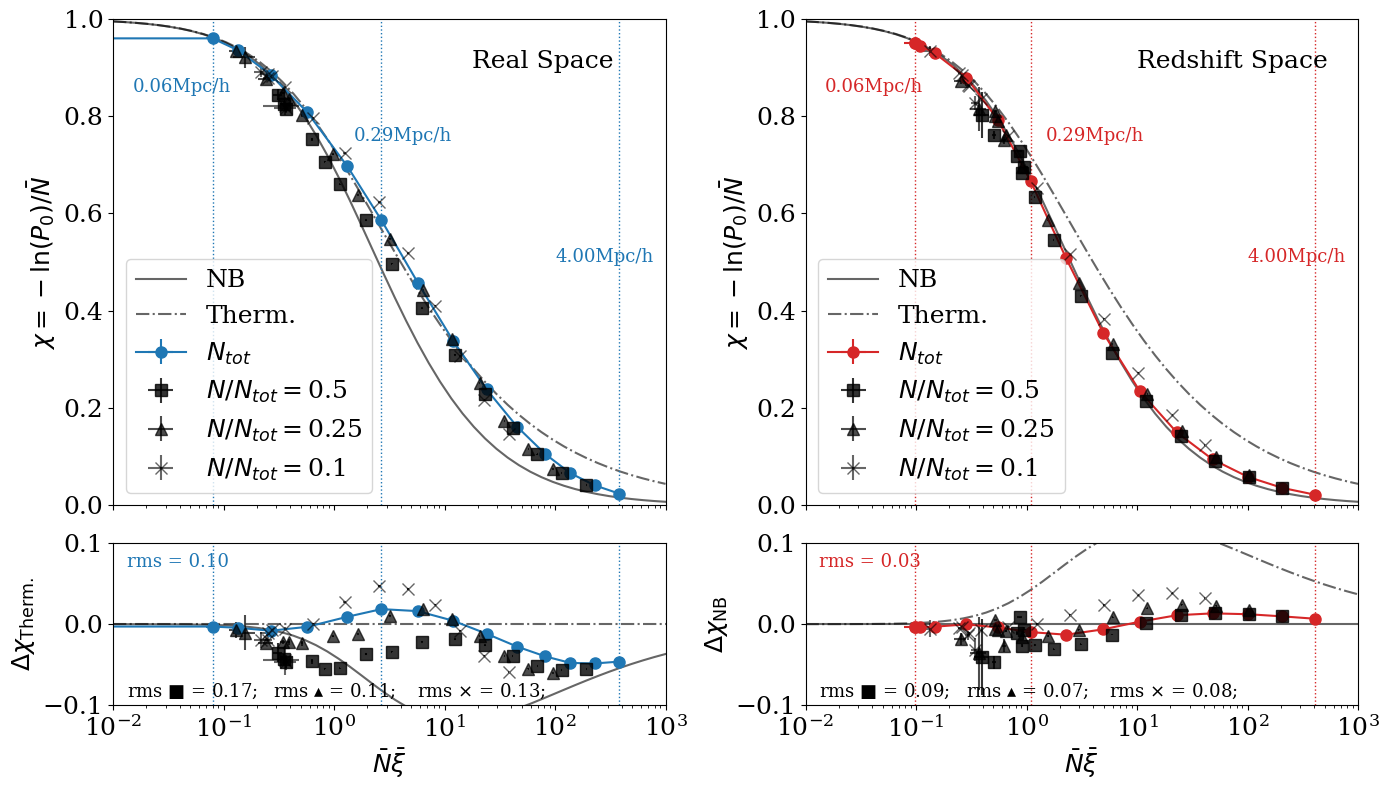

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *


def chi_NB(x):
    return np.log(1 + x) / x


def chi_T(x):
    return (np.sqrt(1 + 2 * x) - 1) / x


plt.rcParams["font.family"] = "serif"
fs = 18
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ms = 8

color_list = ['C00', 'C03']
text_list = ['Real Space', 'Redshift Space']
modifier_list = ['', 'redshiftz_']

for ax, ax1, color, text, modifier in zip(axs[0], axs[1], color_list, text_list, modifier_list):
    xmin, xmax = 1E-2, 1E3
    x = np.geomspace(xmin, xmax, 50)
    ax.plot(x, chi_NB(x), label='NB', c='k', alpha=0.6)
    ax.plot(x, chi_T(x), label='Therm.', c='k', ls='-.', alpha=0.6)

    if text == 'Real Space':
        ax1.plot(x, chi_NB(x) - chi_T(x), c='k', alpha=0.6)
        ax1.plot(x, chi_T(x) - chi_T(x), c='k', ls='-.', alpha=0.6)
    if text == 'Redshift Space':
        ax1.plot(x, chi_NB(x) - chi_NB(x), c='k', alpha=0.6)
        ax1.plot(x, chi_T(x) - chi_NB(x), c='k', ls='-.', alpha=0.6)

    file = f'../data/allgxs_nesf100000_jk.npz'
    if text == 'Redshift Space':
        file = f'../data/allgxs_nesf100000_redshiftz_jk.npz'

    stats = np.load(file)
    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err = delta_P0(P0, 10E5)
    NXierr = delta_NXi(NXi, N_mean, N_mean_std, xi_mean, xi_mean_std)
    chierr = delta_chi(chi, P0, P0err, N_mean, N_mean_std)

    ebar = ax.errorbar(NXi, chi, xerr=NXierr, yerr=chierr, marker='o', label=r'$N_{tot}$', color=color, markersize=ms)
    if text == 'Real Space':
        ax1.errorbar(NXi, chi - chi_T(NXi), xerr=NXierr, yerr=chierr, marker='o', color=color, markersize=ms)

        rms = np.sqrt(np.sum((chi - chi_T(NXi)) ** 2))
        ax1.text(.025, .85, f'rms = {rms:.2f}', size=fs - 5, transform=ax1.transAxes, color=color)

    if text == 'Redshift Space':
        ax1.errorbar(NXi, chi - chi_NB(NXi), xerr=NXierr, yerr=chierr, marker='o', color=color, markersize=ms)

        rms = np.sqrt(np.sum((chi - chi_NB(NXi)) ** 2))
        ax1.text(.025, .85, f'rms = {rms:.2f}', size=fs - 5, transform=ax1.transAxes, color=color)

    space = 1.2
    lw = 1
    ls = ':'
    for ind, xpos, ypos in zip([1, 6, -1], [1.5E-2, 1.5, 1E2], [.85, .75, .5]):
        vline = ax.axvline(NXi[ind], lw=lw, ls=ls, color=color)
        ax1.axvline(NXi[ind], lw=lw, ls=ls, color=color)
        ax.text(xpos, ypos, f'{rs[ind] / 1000.:.2f}Mpc/h', color=color, size=fs - 5)

    for ngxs, m, a, xpos, lsym in zip(['0.5', '0.25', '0.1'], ['s', '^', 'x'], [.8, .7, .6], [.025, .29, .55],
                                      [r'$\blacksquare$', r'$\blacktriangle$', r'$\times$']):
        file = f'../data/dilut{ngxs}_nesf100000_{modifier}jk.npz'
        stats = np.load(file)
        chi = stats['arr_0']
        chi_std = stats['arr_1']
        NXi = stats['arr_2']
        NXi_std = stats['arr_3']
        P0 = stats['arr_4']
        P0_std = stats['arr_5']
        N_mean = stats['arr_6']
        N_mean_std = stats['arr_7']
        xi_mean = stats['arr_8']
        xi_mean_std = stats['arr_9']
        rs = stats['arr_10']

        P0err = delta_P0(P0, 10E5)
        NXierr = delta_NXi(NXi, N_mean, N_mean_std, xi_mean, xi_mean_std)
        chierr = delta_chi(chi, P0, P0err, N_mean, N_mean_std)

        ax.errorbar(NXi, chi, xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', label=r'$N/N_{tot}=$' + ngxs,
                    markersize=ms)
        if text == 'Real Space':
            ax1.errorbar(NXi, chi - chi_T(NXi), xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', markersize=ms)

            rms = np.sqrt(np.sum((chi - chi_T(NXi)) ** 2))
            ax1.text(xpos, .05, rf'rms {str(lsym)} = {rms:.2f};', size=fs - 5, transform=ax1.transAxes)

        if text == 'Redshift Space':
            ax1.errorbar(NXi, chi - chi_NB(NXi), xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', markersize=ms)

            a = r'$\alpha$'
            rms = np.sqrt(np.sum((chi - chi_NB(NXi)) ** 2))
            ax1.text(xpos, .05, rf'rms {str(lsym)} = {rms:.2f};', size=fs - 5, transform=ax1.transAxes)

    ax.legend(loc=3, fontsize=fs)
    ax.set_xscale('log')
    ax.set_ylabel(r'$\chi=-\mathrm{ln}(P_0)/\bar{N}$', fontsize=fs)
    if text == 'Redshift Space':
        ax.text(.6, .9, text, transform=ax.transAxes, fontsize=fs)
    else:
        ax.text(.65, .9, text, transform=ax.transAxes, fontsize=fs)
    ax.set_xticks([])

    ax1.set_xscale('log')
    ax1.set_xlabel(r'$\bar{N}\bar{\xi}$', fontsize=fs)
    if text == 'Real Space':
        ax1.set_ylabel(r'$\Delta\chi_\mathrm{Therm.}$', fontsize=fs)
    if text == 'Redshift Space':
        ax1.set_ylabel(r'$\Delta\chi_\mathrm{NB}$', fontsize=fs)

    ax1.set_ylim([-.1, .1])
    ax.set_ylim([0, 1])
    ax.set_xlim([1E-2, 1E3])

plt.tight_layout()
plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.png')
plt.savefig('../plots/chi_vs_NXi_dilute_bothspaces.pdf')
plt.show()


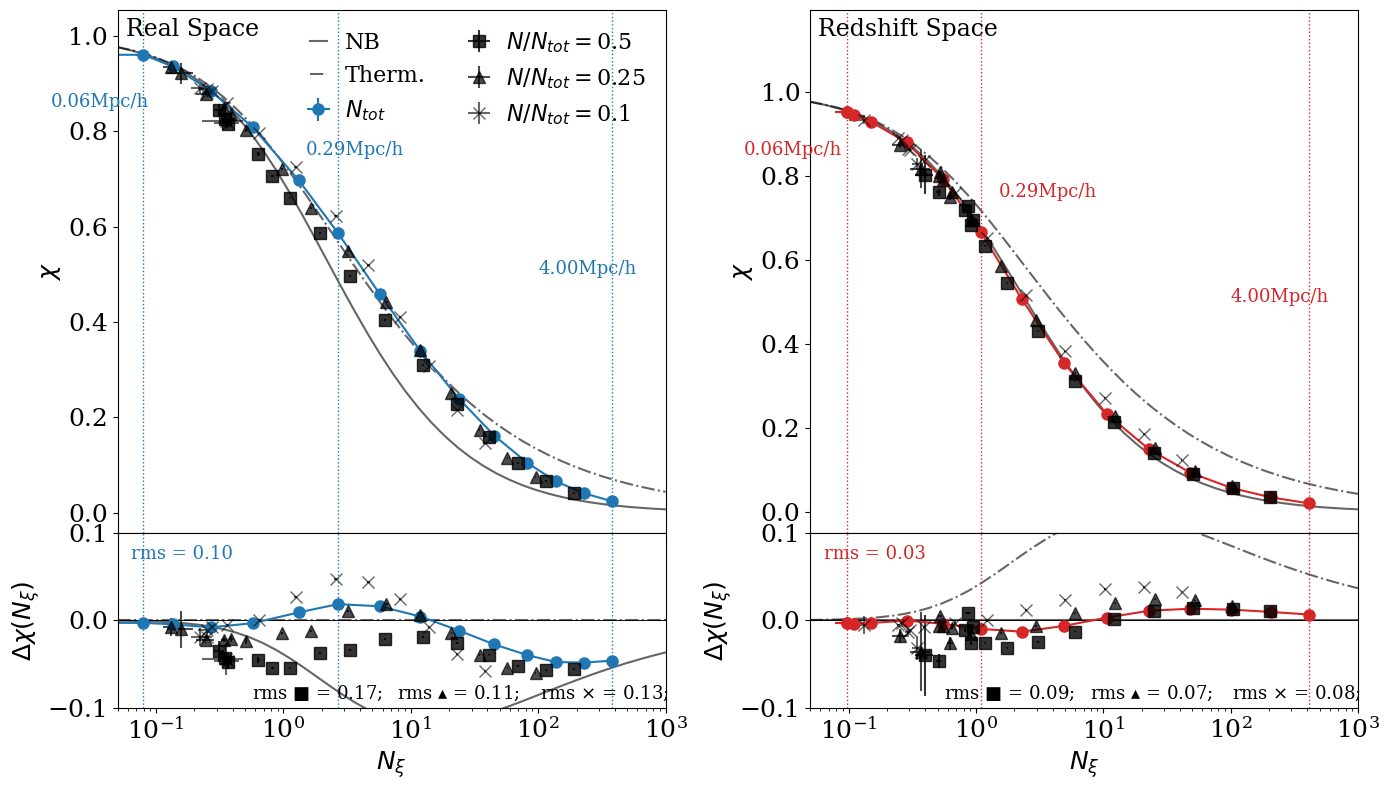

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *

def chi_NB(x):
    return np.log(1 + x) / x

def chi_T(x):
    return (np.sqrt(1 + 2 * x) - 1) / x

plt.rcParams["font.family"] = "serif"
fs = 18
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ms = 8

for ax, ax1, color, text, modifier in zip(axs[0], axs[1], ['C00', 'C03'], ['Real Space', 'Redshift Space'],
                                          ['', 'redshiftz_']):
    xmin, xmax = 1E-2, 1E3
    x = np.geomspace(xmin, xmax, 50)
    ax.plot(x, chi_NB(x), label='NB', c='k', alpha=0.6)
    ax.plot(x, chi_T(x), label='Therm.', c='k', ls='-.', alpha=0.6)

    if text == 'Real Space':
        ax1.plot(x, chi_NB(x) - chi_T(x), c='k', alpha=0.6)
        ax1.plot(x, chi_T(x) - chi_T(x), c='k', ls='-.', alpha=0.6)
        file = f'../data/allgxs_nesf100000_jk.npz'

    if text == 'Redshift Space':
        ax1.plot(x, chi_NB(x) - chi_NB(x), c='k', alpha=0.6)
        ax1.plot(x, chi_T(x) - chi_NB(x), c='k', ls='-.', alpha=0.6)
        file = f'../data/allgxs_nesf100000_redshiftz_jk.npz'

    #if text == 'Redshift Space':

    stats = np.load(file)
    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err = delta_P0(P0, 10E5)
    NXierr = delta_NXi(NXi, N_mean, N_mean_std, xi_mean, xi_mean_std)
    chierr = delta_chi(chi, P0, P0err, N_mean, N_mean_std)

    ebar = ax.errorbar(NXi, chi, xerr=NXierr, yerr=chierr, marker='o', label=r'$N_{tot}$', color=color, markersize=ms)
    if text == 'Real Space':
        ax1.errorbar(NXi, chi - chi_T(NXi), xerr=NXierr, yerr=chierr, marker='o', color=color, markersize=ms)
        rms = np.sqrt(np.sum((chi - chi_T(NXi)) ** 2))
        ax1.text(.025, .85, f'rms = {rms:.2f}', size=fs - 5, transform=ax1.transAxes, color=color)
    if text == 'Redshift Space':
        ax1.errorbar(NXi, chi - chi_NB(NXi), xerr=NXierr, yerr=chierr, marker='o', color=color, markersize=ms)
        rms = np.sqrt(np.sum((chi - chi_NB(NXi)) ** 2))
        ax1.text(.025, .85, f'rms = {rms:.2f}', size=fs - 5, transform=ax1.transAxes, color=color)

    space = 1.2
    lw = 1
    ls = ':'
    for ind, xpos, ypos in zip([1, 6, -1], [1.5E-2, 1.5, 1E2], [.85, .75, .5]):
        vline = ax.axvline(NXi[ind], lw=lw, ls=ls, color=color)
        ax1.axvline(NXi[ind], lw=lw, ls=ls, color=color)
        ax.text(xpos, ypos, f'{rs[ind] / 1000.:.2f}Mpc/h', color=color, size=fs - 5)

    for ngxs, m, a, xpos, lsym in zip(['0.5', '0.25', '0.1'], ['s', '^', 'x'], [.8, .7, .6], [.025+.22, .29+.22, .55+.22],
                                      [r'$\blacksquare$', r'$\blacktriangle$', r'$\times$']):
        file = f'../data/dilut{ngxs}_nesf100000_{modifier}jk.npz'
        stats = np.load(file)
        chi = stats['arr_0']
        chi_std = stats['arr_1']
        NXi = stats['arr_2']
        NXi_std = stats['arr_3']
        P0 = stats['arr_4']
        P0_std = stats['arr_5']
        N_mean = stats['arr_6']
        N_mean_std = stats['arr_7']
        xi_mean = stats['arr_8']
        xi_mean_std = stats['arr_9']
        rs = stats['arr_10']

        P0err = delta_P0(P0, 10E5)
        NXierr = delta_NXi(NXi, N_mean, N_mean_std, xi_mean, xi_mean_std)
        chierr = delta_chi(chi, P0, P0err, N_mean, N_mean_std)

        ax.errorbar(NXi, chi, xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', label=r'$N/N_{tot}=$' + ngxs,
                    markersize=ms)
        if text == 'Real Space':
            ax1.errorbar(NXi, chi - chi_T(NXi), xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', markersize=ms)
            rms = np.sqrt(np.sum((chi - chi_T(NXi)) ** 2))
            ax1.text(xpos, .05, rf'rms {str(lsym)} = {rms:.2f};', size=fs - 5, transform=ax1.transAxes)
        if text == 'Redshift Space':
            ax1.errorbar(NXi, chi - chi_NB(NXi), xerr=NXierr, yerr=chierr, fmt=m, alpha=a, color='k', markersize=ms)
            rms = np.sqrt(np.sum((chi - chi_NB(NXi)) ** 2))
            ax1.text(xpos, .05, rf'rms {str(lsym)} = {rms:.2f};', size=fs - 5, transform=ax1.transAxes)

    if text == 'Real Space':
        ax.legend(loc='upper right', ncol=2, fontsize=fs - 2, handlelength=0.8, frameon=False)
    ax1.set_xlabel(r'$N_{\xi}$', size=fs)
    ax1.set_ylabel(r'$\Delta \chi(N_{\xi})$', size=fs)
    ax1.axhline(0, color='k', lw=0.5)
    ax.set_xscale('log')
    ax.set_xlim(5E-2, 1E3)
    ax.set_ylabel(r'$\chi$', size=fs)
    ax.text(0.015, .95, text, transform=ax.transAxes, size=fs - 1)
    ax1.axhline(0, color='k', lw=0.5)
    ax1.set_ylim(-0.1, 0.1)
    ax1.set_yticks([-0.1, 0, 0.1])

fig.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
